In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

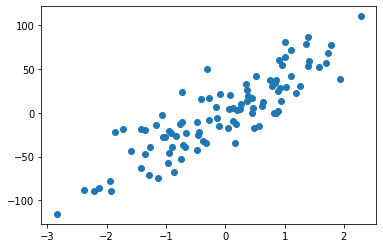

In [93]:
X,y=make_regression(n_samples=100, n_features=1, noise=20)
plt.scatter(X,y)

## 以梯度下降找出回歸線

In [95]:
#Parameters
alpha=0.001 #learning rate
repeats=1000

#Initializing variables
w0=0
w1=0
errors=[]
points=[]

w0: 2.227159
w1: 34.856849


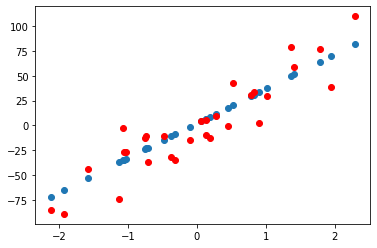

In [96]:
for j in range(repeats):
    error_sum=0
    squared_error_sum=0
    error_sum_x=0
    for i in range(len(X_train)):
        predict=w0+(X_train[i]*w1)
        squared_error_sum=squared_error_sum+(y_train[i]-predict)**2
        error_sum=error_sum+y_train[i]-predict
        error_sum_x=error_sum_x+(y_train[i]-predict)*X_train[i]
    w0=w0+(alpha*error_sum)
    w1=w1+(alpha*error_sum_x)
    errors.append(squared_error_sum/len(X_train))

print('w0: %2f' %w0)
print('w1: %2f' %w1)
predicts=[]
mean_error=0
for i in range(len(X_test)):
    predict=w0+(X_test[i]*w1)
    predicts.append(predict)
plt.scatter(X_test,predicts)
plt.scatter(X_test, y_test, color='red')
plt.show()

## 1.簡單線性回歸

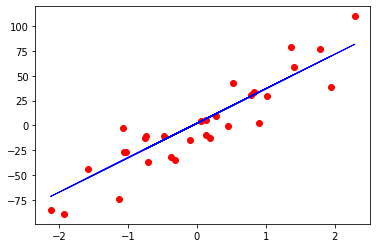

Intercept:  2.22715926491593
Cofficient:  [34.85684883]
訓練集預R2 0.731644969141293
測試集預測結果R2 0.8306892675295482


In [97]:

regr=linear_model.LinearRegression()
regr.fit(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#plt.scatter(X_train, y_train, color='black')
plt.scatter(X_test, y_test, color='red')
#plt.scatter(X_test, regr.predict(X_test), color='blue')
plt.plot(X_test, regr.predict(X_test),color='blue',linewidth=1)
plt.show()
print("Intercept: ",regr.intercept_)
print("Cofficient: ",regr.coef_)
print("訓練集預R2",regr.score(X_train,y_train))
print("測試集預測結果R2",regr.score(X_test,y_test))

## 2.多項式回歸

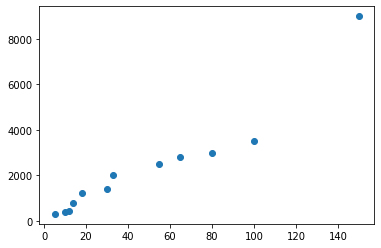

In [98]:
size=[5,10,12,14,18,30,33,55,65,80,100,150]
price=[300,400,450,800,1200,1400,2000,2500,2800,3000,3500,9000]
plt.scatter(size,price)
plt.show()

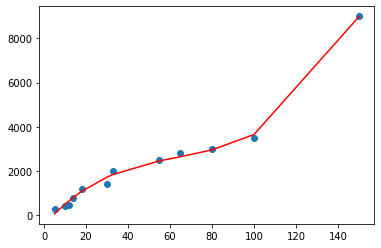

In [17]:
series_dict={'X':size,'y':price}
df=pd.DataFrame(series_dict)
X=df[['X']]
y=df[['y']]
# 3為多項式三次方
model=make_pipeline(PolynomialFeatures(3),linear_model.LinearRegression())
model.fit(X,y)

plt.scatter(X,y)
plt.plot(X,model.predict(X),color='red')


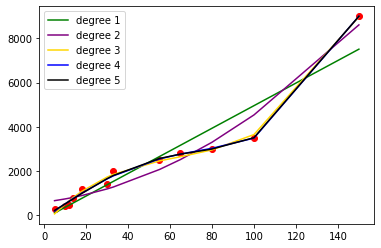

[0.9059983910519219,
 0.9585314218103534,
 0.9951555665160685,
 0.9966093112780661,
 0.9966678106695316]

In [117]:
scores=[]
colors=['green','purple','gold','blue','black']
plt.scatter(X,y,c='red')
for count,degree in enumerate([1,2,3,4,5]):
    model=make_pipeline(PolynomialFeatures(degree),linear_model.LinearRegression())
    model.fit(X,y)
    scores.append(model.score(X,y))
    plt.plot(X,model.predict(X),color=colors[count],label='degree %d' %degree)

plt.legend(loc=2)
plt.show()
scores

## 3.多元線性回歸(多特徵)

### 多元回歸(簡單範例)

In [11]:

X,y=make_regression(n_samples=100, n_features=5, noise=20) # 製作100個樣本 五個特徵
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [5]:
regr=linear_model.LinearRegression() # 支援多元回歸
regr.fit(X_train, y_train)
print(regr.intercept_)
print(regr.coef_)
print(regr.score(X_train,y_train))

-2.2168459678600847
[18.59487357 29.00759209 64.12762806 82.49904471 78.54230066]
0.9815953525271017


### 多元多項式回規(簡單範例)

In [34]:

X,y=make_regression(n_samples=100, n_features=5, noise=20) # 製作100個樣本 五個特徵
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model=make_pipeline(PolynomialFeatures(3),linear_model.LinearRegression())
model.fit(X,y)

pd.DataFrame(X_train) 


,0,1,2,3,4
0,0.518570,0.088053,0.352817,0.007435,-0.550571
1,1.533071,-0.355507,0.658088,-0.393608,1.222096
2,-0.754013,-0.076651,0.497610,-1.081584,0.175354
3,-0.431803,0.807648,1.701901,-0.823007,0.315993
4,-0.544747,-1.481421,0.873526,-0.183783,0.019169
...,...,...,...,...,...
65,-0.514786,-0.407524,0.044236,-0.330291,0.278152
66,-1.269645,-0.498124,-1.270138,0.668716,-0.555033
67,1.231858,0.124786,1.258391,-0.123384,0.712112
68,0.536036,1.048666,-0.731700,1.079668,0.107273


### 多元回歸(簡單房價範例)

In [2]:

size=[5,10,12,14,18,30,33,55,65,80,100,150]
distance=[50,20,70,100,200,150,30,50,70,35,40,20]
price=[300,400,450,800,1200,1400,2000,2500,2800,3000,3500,9000]
series_dict={'X1':size,'X2':distance,'y':price}
df=pd.DataFrame(series_dict)
X=df[['X1','X2']]
y=df[['y']]
regr=linear_model.LinearRegression()
regr.fit(X, y)
## 多元多項式
# model=make_pipeline(PolynomialFeatures(3),linear_model.LinearRegression())
# model.fit(X,y)


LinearRegression()

In [ ]:
#series
df['X1']
#dataframe
df[['X1']]
#取得二維
df.loc[0:0,['X1','X2']].values

In [91]:
# 多元回歸
print(regr.intercept_)
print(regr.coef_)
print(regr.score(X,y))
print(regr.predict(X))
# 多元多項式
print(model.score(X,y))
print(model.predict(X))

[-309.68167455]
[[51.94345057  1.62218727]]
0.9071864679091037
[[  31.14494163]
 [ 242.1965765 ]
 [ 427.19284096]
 [ 579.74536009]
 [ 949.737889  ]
 [1491.94993256]
 [1453.11781232]
 [2628.31747023]
 [3180.19572128]
 [3902.57092554]
 [4949.55087331]
 [7514.27965659]]
0.9975740156734999
[[ 125.01730119]
 [ 463.05289637]
 [ 716.24839952]
 [ 690.36132291]
 [1194.48001508]
 [1431.76594094]
 [1934.21422892]
 [2584.90763023]
 [2698.27307925]
 [2938.00009221]
 [3584.95768097]
 [8988.7214124 ]]
